**ABOUT DATASET:**

---
THIS KAGGLE DATASET HAS AROUND 5000 MOVIE REVIEWS

DATASET HAS 2 COLUMNS: 

1.   SENTIMENT(POSITIVE/NEGATIVE)
2.   REVIEW(MOVIE REVIEWS)








### READING DATASET

In [ ]:
import pandas as pd
import numpy as np
import nltk
path1=r'C:\Users\my\Downloads'
df=pd.read_csv(path1 + 'AI.csv')
df.rename(columns={'review' :'text'},inplace=True)
df


FileNotFoundError: ignored

In [ ]:
df.describe()

,text,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### REMOVING PUNCTUATIONS

In [ ]:
punctuations=['!', '@' , '#' , ',' , '&', '.' , '(' , ')' , '[' , ']' , '"' , ':' ,"'" , '?' ,'/','*']
punctuations += '�' 
def remove_punct(doc):  
    for p in punctuations:
      if p in doc:
        doc = doc.replace(p,"")
    # print(doc)
    return doc

df['text'] = df['text'].apply(remove_punct)

In [ ]:
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production <br ><br >The fi...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


### REMOVING STOPWORDS AND 'rt' AND HTML AND TAGS(I.E. @)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))

def remove_stopwords(doc):
  # split each sentence into words and convert them into lower case and put in a words_filtered list
    words_filtered = [word.lower() for word in doc.split()]

    words_cleaned=[]
    for word in words_filtered:
      if 'http' not in word  and not word.startswith('@')and not word.startswith('<')and not word.startswith('>') and not word.startswith('#')  and word != 'RT' and word!='rt':
           words_cleaned.append(word)
    
    # join the words back to a sentenced(stopwords removed) and return i
    doc_without_stopwords = ' '.join([word for word in words_cleaned if not word in stopwords_set])
    
    return doc_without_stopwords

# apply stopwords function to text column
df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\my\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,text,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


### TOKENIZATION(splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms.)

In [ ]:
nltk.download('punkt')
# tokenize
from nltk.tokenize import word_tokenize,TweetTokenizer

def tokenize(text):
#   nltk_tokens = nltk.sent_tokenize(text)
  tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
  nltk_tokens = tokenizer.tokenize(text)
  return nltk_tokens


df['text'] = df['text'].apply(tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\my\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### STEMMING(Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language)

In [ ]:
from nltk.stem import PorterStemmer
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(w) for w in text]

df['text'] = df['text'].apply(stemming)
print(df['text'])

0        [one, review, mention, watch, 1, oz, episod, y...
1        [wonder, littl, product, film, techniqu, unass...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, there, famili, littl, boy, jake, think...
4        [petter, mattei, love, time, money, visual, st...
                               ...                        
49995    [thought, movi, right, good, job, wasnt, creat...
49996    [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997    [cathol, taught, parochi, elementari, school, ...
49998    [im, go, disagre, previou, comment, side, malt...
49999    [one, expect, star, trek, movi, high, art, fan...
Name: text, Length: 50000, dtype: object


### LAMMENTIZATION( to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .)

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer  
def lemmatize_text(text):
  
  w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
  lemmatizer = nltk.stem.WordNetLemmatizer()
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(w) for w in text]

df['text'] = df['text'].apply(lemmatize_text)
print(df['text'])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\my\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        [one, reviewer, mentioned, watching, 1, oz, ep...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there, family, little, boy, jake, ...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movie, high, art, f...
Name: text, Length: 50000, dtype: object


### VISUALIZING TEXT DATA USING WORD CLOUDS

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def make_cloud(data):
  wordcloud = WordCloud( background_color="white",width=2000,height=2000, max_words=2000).generate(str(data))
  plt.figure(1,figsize=(10, 10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()  

In [ ]:
train_pos = df[ df['sentiment'] == 'positive']
train_pos = train_pos['text']
train_neg = df[ df['sentiment'] == 'negative']
train_neg = train_neg['text']

### POSITIVE WORDCLOUD

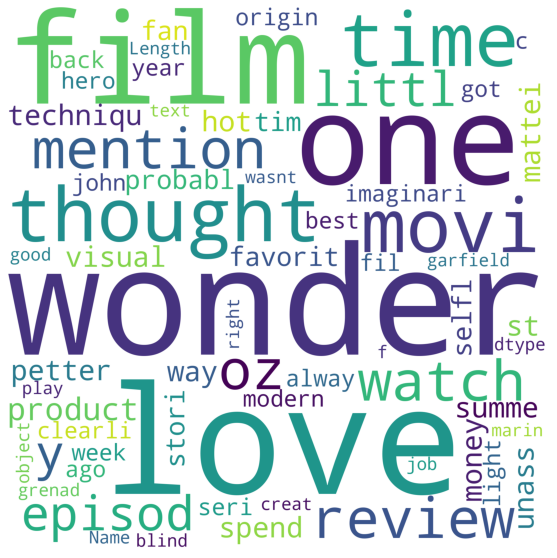

In [ ]:
# FOR POSITIVE WORDS:
make_cloud(train_pos)
#If positive means negative then negative means??

### NEGATIVE WORDCLOUD

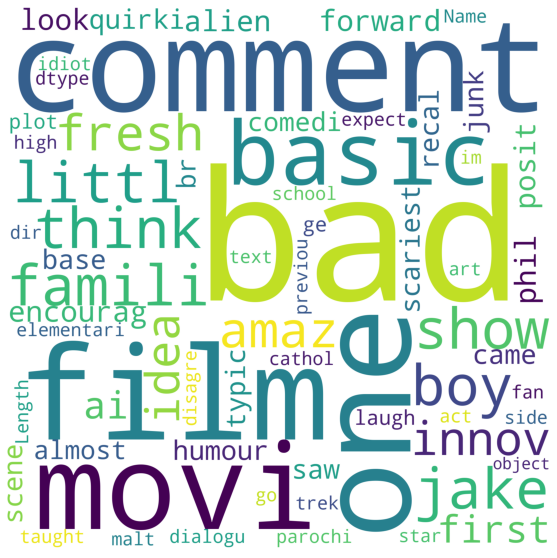

In [ ]:
# for negative words:
make_cloud(train_neg)

### COMBINING LIST INTO A SINGLE STRING

In [ ]:
def convert(lst):       
    return ' , '.join(lst)
df['text'] = df['text'].apply(lambda s:convert(s))
df

,text,sentiment
0,"one , review , mention , watch , 1 , oz , epis...",positive
1,"wonder , littl , product , film , techniqu , u...",positive
2,"thought , wonder , way , spend , time , hot , ...",positive
3,"basic , there , famili , littl , boy , jake , ...",negative
4,"petter , mattei , love , time , money , visual...",positive
...,...,...
49995,"thought , movi , right , good , job , wasnt , ...",positive
49996,"bad , plot , bad , dialogu , bad , act , idiot...",negative
49997,"cathol , taught , parochi , elementari , schoo...",negative
49998,"im , go , disagre , previou , comment , side ,...",negative


### COUNT VECTORIZATION(Create a vector that has as many dimensions as your corpora has unique words. Each unique word has a unique dimension and will be represented by a 1 in that dimension with 0s everywhere else.)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

combine = CountVectorizer()
combine = combine.fit(df['text'])
combined_vector = combine.transform(df['text'])

### Tfidf TRANSFORMATION(instead of just featuring a count, they feature numerical representations where words aren’t just there or not there. Instead, words are represented by their term frequency multiplied by their inverse document frequency.)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(combined_vector)
data_tfidf = tfidf_transformer.transform(combined_vector)
print(data_tfidf.shape)

(50000, 104033)


### SPLITTING DATA INTO TESTING AND TRAINING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(data_tfidf,y,test_size =0.25,random_state=7)

### BEST MODEL (ON BASIS OF BEST F1 SCORE)

In [ ]:
BestModel=' '
Bestf1=0

### 1. SGD CLASSIFIER(Stochastic - Random, Gradient - slope, Descent - downwards)
implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

A support vector machine takes data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the decision boundary: anything that falls to one side of it we will classify as POSITIVE, and anything that falls to the other as NEGATIVE.



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

svm = SGDClassifier().fit(xtrain,ytrain)
ypred = svm.predict(xtest)
report=classification_report(ytest,ypred,target_names=['Negative','Positive'])

# Plotting confusion matrix                 
plot_confusion_matrix(svm,xtest, ytest)   
plt.show() 

#Printing classification report for this model
print("Classification Report: \n",report)                  

# F1-Score of this model
f1score=f1_score(ytest, ypred,average='weighted')
print ("F1 score: \n", f1score)           



if f1score>Bestf1:
    Bestf1=f1score
    BestModel=svm

NameError: ignored

### 2. BERNOULLI NAIVE BAYES

Naive Bayes:

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). 

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      6265
    Positive       0.87      0.83      0.85      6235

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500

F1 score: 
 0.8518925553611486


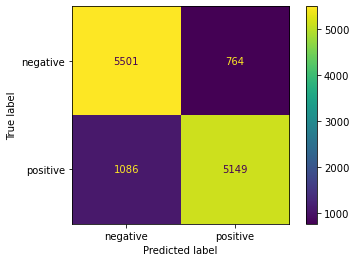

In [ ]:
from sklearn.naive_bayes import BernoulliNB
GNB_classifier = BernoulliNB()
GNB_classifier.fit(xtrain,ytrain)
ypred=GNB_classifier.predict(xtest)

report=classification_report(ytest,ypred,target_names=['Negative','Positive'])
print("Classification Report: \n",report)                  #Printing classification report for this model
f1score=f1_score(ytest, ypred,average='weighted')
print ("F1 score: \n", f1score)                           # F1-Score of this model
plot_confusion_matrix(GNB_classifier,xtest, ytest)   #Plotting confusion matrix 
plt.show()  

if f1score>Bestf1:
    Bestf1=f1score
    BestModel=GNB_classifier

### SPLITTING DATA INTO TEST, TRAIN AND VALIDATE

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data_tfidf, y, test_size=0.2, random_state=1)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

this algorithm creates a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

### 3. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
maxf1=0
max_depth=0

for maximum_tree_depth in range(5,60,4):
    model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
    model_dt.fit(xtrain,ytrain)
    ypred = model_dt.predict(xval)
#     print(confusion_matrix(ypred, yval))
#     print(accuracy_score(ypred,yval))
    f1score=f1_score(ypred,yval, average='weighted')
    print("f1score: ",f1score, " depth: ", maximum_tree_depth)
    if f1score>maxf1:
        maxf1 = f1score
        max_depth = maximum_tree_depth
        
print("Best f1 is at depth: ", max_depth)

f1score:  0.7156042695381946  depth:  5
f1score:  0.7313084046905715  depth:  9
f1score:  0.7358332761596909  depth:  13
f1score:  0.7368020967210412  depth:  17
f1score:  0.7330746071366322  depth:  21
f1score:  0.7300562240330902  depth:  25
f1score:  0.732639520483874  depth:  29
f1score:  0.7196866496022428  depth:  33
f1score:  0.7246305953338756  depth:  37
f1score:  0.7178981416921896  depth:  41
f1score:  0.7209434130286884  depth:  45
f1score:  0.7191786263961998  depth:  49
f1score:  0.7186936739005185  depth:  53
f1score:  0.720628612391193  depth:  57
Best f1 is at depth:  17


In [ ]:
dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.78      0.66      0.71      5044
    Positive       0.70      0.82      0.75      4956

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000

F1 score: 
 0.7340842134734819


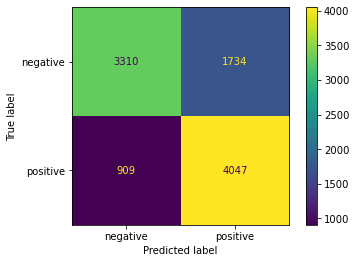

In [ ]:
report=classification_report(ytest,ypred,target_names=['Negative','Positive'])
print("Classification Report: \n",report)                  #Printing classification report for this model
f1score=f1_score(ytest, ypred,average='weighted')
print ("F1 score: \n", f1score)                           # F1-Score of this model
plot_confusion_matrix(dt,xtest, ytest)   #Plotting confusion matrix 
plt.show()  

if f1score>Bestf1:
    Bestf1=f1score
    BestModel=dt

In [ ]:
print(" Best Model is: ", BestModel)
print(" Best f1score is: ", Bestf1)

 Best Model is:  SGDClassifier()
 Best f1score is:  0.8922858747704708


**WE GOT MAXIMUM ACCURACY WITH SUPPORT VECTOR MACHINE MODEL WITH F SCORE AS 0.89**